In [55]:
d_cash.groupby('Category')["TransTotal"].mean(), d_credit.groupby('Category')["TransTotal"].mean()

(Category
 Carbonated        1.933788
 Food              1.707926
 Non Carbonated    2.519704
 Water             1.828448
 Name: TransTotal, dtype: float64,
 Category
 Carbonated        2.740909
 Food              2.842359
 Non Carbonated    3.224379
 Water             2.336788
 Name: TransTotal, dtype: float64)

There seems to be a difference between the average transtotal with cash and with credit in all categories of products, let us start by seeing whether the one in the "Carbonated" category is indeed statistically significant.

# Second T-test <a class="anchor" id="ninth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

In [56]:
from scipy import stats
stats.ttest_ind(a=d_cash[d_cash['Category'] == 'Carbonated'].TransTotal, b=d_credit[d_credit['Category'] == 'Carbonated'].TransTotal, equal_var=False)

Ttest_indResult(statistic=-13.847037248962115, pvalue=3.392838283865919e-38)

The t-test yield a p-value of 3.392838283865919e-38, meaning that the null hypothesis of non-significance is rejected. Given that there is a significant difference between the average transaction total with cash and credit card when it comes to "Carbonated" drinks, a further analysis is conducted to deepen the understanding.

# Cash-Carbonated vs Credit-Carbonated <a class="anchor" id="tenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Here follows some comparisons between the carbonated drinks that are bought with cash and those that are bought with credit card.

In [57]:
carbonated_cash = d_cash[d_cash['Category'] == 'Carbonated']
carbonated_credit =d_credit[d_credit['Category'] == 'Carbonated']

In [58]:
l = carbonated_cash.groupby('Product')['RPrice'].mean()-carbonated_credit.groupby('Product')['RPrice'].mean() == 0
#carbonated["Product"][l]
l = l[l==False]
la = l[l==False].index

In [59]:
carbonated_differ = n_db.loc[n_db['Product'].isin(la)]
carbonated_differ['Product'].value_counts()

Coca Cola - Zero Sugar                      517
Monster Energy Original                     385
Sunkist Soda - Orange                       217
Red Bull - Original                         157
Coca Cola - Regular                         155
Starbucks Refresher - Real Coconut Water     53
Canada Dry - Ginger Ale & Lemonde            32
Keto Krisp - Almond Butter                   27
Spindrift - Sparkling Water  Lime            22
Keto Krisp - Almond/Chocolate                15
Canada Dry - Ginger Ale                      15
Remedy Kombucha - Ginger Lemon                2
Name: Product, dtype: int64

In [60]:
carbonated_differ_g = carbonated_differ.drop(['Month','TransTotal','Festive','Location','Type','Machine','Category','RQty','LineTotal','Day_of_Week'],axis=1)
carbonated_differ_g

,Product,RCoil,RPrice
8,Monster Energy Original,144,3.0
17,Monster Energy Original,146,3.0
19,Monster Energy Original,146,3.0
20,Monster Energy Original,144,3.0
21,Spindrift - Sparkling Water Lime,140,1.0
...,...,...,...
6387,Starbucks Refresher - Real Coconut Water,148,3.0
6390,Coca Cola - Zero Sugar,140,1.5
6397,Coca Cola - Zero Sugar,141,2.0
6400,Coca Cola - Zero Sugar,141,2.0


Product
Canada Dry - Ginger Ale                     AxesSubplot(0.125,0.125;0.775x0.755)
Canada Dry - Ginger Ale & Lemonde           AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Regular                         AxesSubplot(0.125,0.125;0.775x0.755)
Coca Cola - Zero Sugar                      AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond Butter                  AxesSubplot(0.125,0.125;0.775x0.755)
Keto Krisp - Almond/Chocolate               AxesSubplot(0.125,0.125;0.775x0.755)
Monster Energy Original                     AxesSubplot(0.125,0.125;0.775x0.755)
Red Bull - Original                         AxesSubplot(0.125,0.125;0.775x0.755)
Remedy Kombucha - Ginger Lemon              AxesSubplot(0.125,0.125;0.775x0.755)
Spindrift - Sparkling Water  Lime           AxesSubplot(0.125,0.125;0.775x0.755)
Starbucks Refresher - Real Coconut Water    AxesSubplot(0.125,0.125;0.775x0.755)
Sunkist Soda - Orange                       AxesSubplot(0.125,0.125;0.775x0.755)
Name: RPrice, dtype:

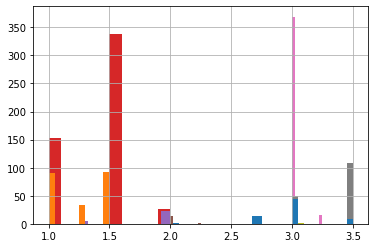

In [61]:
carbonated_differ_g.groupby('Product')['RPrice'].hist()

In [62]:
carbonated_differ_g.groupby('Product')['RPrice'].value_counts()

Product                                   RPrice
Canada Dry - Ginger Ale                   2.75       14
                                          2.00        1
Canada Dry - Ginger Ale & Lemonde         1.50       22
                                          2.00       10
Coca Cola - Regular                       1.50      145
                                          2.00       10
Coca Cola - Zero Sugar                    1.50      339
                                          1.00      152
                                          2.00       26
Keto Krisp - Almond Butter                2.00       22
                                          1.25        5
Keto Krisp - Almond/Chocolate             2.00       14
                                          2.25        1
Monster Energy Original                   3.00      369
                                          3.25       16
Red Bull - Original                       3.50      108
                                          3.00       49

In [63]:
cola_zero = carbonated_differ.loc[carbonated_differ['Product'] == 'Coca Cola - Zero Sugar']
cola_zero.groupby('RPrice')['Location'].value_counts()

RPrice  Location         
1.0     GuttenPlans          152
1.5     EB Public Library    140
        GuttenPlans          128
        Brunswick Sq Mall     61
        Earle Asphalt         10
2.0     EB Public Library     26
Name: Location, dtype: int64

In [64]:
cola_zero.groupby('RPrice')['Month'].value_counts()

RPrice  Month   
1.0     January     52
        March       45
        February    43
        April       12
1.5     April       88
        May         84
        July        66
        June        65
        March       23
        February     8
        August       5
2.0     August      26
Name: Month, dtype: int64

In [65]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('Product')['RPrice'].mean()

Product
Bubly - Cherry                                   1.500000
Bubly - Mango                                    1.500000
Canada Dry - Ginger Ale                          2.700000
Canada Dry - Ginger Ale & Lemonde                1.656250
Coca Cola - Regular                              1.532258
Coca Cola - Zero Sugar                           1.378143
Keto Krisp - Almond Butter                       1.861111
Keto Krisp - Almond/Chocolate                    2.016667
Monster Energy  Zero Ultra                       3.000000
Monster Energy Original                          3.010390
Red Bull - Energy Drink - Sugar Free             3.500000
Red Bull - Original                              3.343949
Remedy Kombucha - Ginger Lemon                   3.000000
S. Pellegrino Essenza Mineral Water - Blood O    2.500000
Spindrift - Sparkling Water  Lime                1.431818
Spindrift - Sparkling Water - Pineapple          1.500000
Starbucks Refresher - Real Coconut Water         3.075472
Sunkis

In [66]:
carbonated = n_db[n_db['Category']=='Carbonated']
carbonated.groupby('RPrice')['Product'].count()

RPrice
1.00    245
1.25     39
1.50    679
2.00     83
2.25      1
2.50      3
2.75     14
3.00    469
3.25     16
3.50    137
Name: Product, dtype: int64

In [67]:
carbonated.groupby('Product')['RPrice'].sum()

Product
Bubly - Cherry                                      7.50
Bubly - Mango                                       7.50
Canada Dry - Ginger Ale                            40.50
Canada Dry - Ginger Ale & Lemonde                  53.00
Coca Cola - Regular                               237.50
Coca Cola - Zero Sugar                            712.50
Keto Krisp - Almond Butter                         50.25
Keto Krisp - Almond/Chocolate                      30.25
Monster Energy  Zero Ultra                         12.00
Monster Energy Original                          1159.00
Red Bull - Energy Drink - Sugar Free               73.50
Red Bull - Original                               525.00
Remedy Kombucha - Ginger Lemon                      6.00
S. Pellegrino Essenza Mineral Water - Blood O       7.50
Spindrift - Sparkling Water  Lime                  31.50
Spindrift - Sparkling Water - Pineapple            76.50
Starbucks Refresher - Real Coconut Water          163.00
Sunkist Soda - Orange  

From the analyses carried out above, what was discovered is that different products have different prices for unknown reasons. Therefore, it is not possible to conclude whether carbonated drinks are those really driving the difference between cash and credit or not. 

The same holds true also for the other categories of products, for easiness of presentation codes are not reported in the final version but the results are in line with what happened with carbonated drinks.

## Location  <a class="anchor" id="eleventh-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

At this point, an analysis of how the location might have had an impact of the transaction total has been carried out.

In [68]:
n_db.Location.value_counts()

GuttenPlans          2567
EB Public Library    1919
Brunswick Sq Mall    1279
Earle Asphalt         676
Name: Location, dtype: int64

In [69]:
n_db.groupby('Location')['TransTotal'].mean()

Location
Brunswick Sq Mall    2.154027
EB Public Library    2.274752
Earle Asphalt        1.865385
GuttenPlans          2.212992
Name: TransTotal, dtype: float64

Here the variation seems to be way smaller that the one obtained for the cash vs credit comparison performed above.

In [70]:
n_db.groupby(['Location','Day_of_Week'])['TransTotal'].sum()

Location           Day_of_Week
Brunswick Sq Mall  Friday          346.75
                   Monday          389.25
                   Saturday        607.50
                   Sunday          509.50
                   Thursday        269.00
                   Tuesday         346.00
                   Wednesday       287.00
EB Public Library  Friday          474.75
                   Monday          762.00
                   Saturday        453.25
                   Sunday          346.75
                   Thursday        744.75
                   Tuesday         771.50
                   Wednesday       812.25
Earle Asphalt      Friday          266.75
                   Monday          265.00
                   Saturday          4.75
                   Sunday            2.75
                   Thursday        236.75
                   Tuesday         224.75
                   Wednesday       260.25
GuttenPlans        Friday         1092.50
                   Monday          826.75
   

From the analysis above, it is possible to confirm what was already foreseeable with logic: transaction totals are higher in the mall during weekends and in the offices/library during weekdays. This was imaginable since the library and the offices are working venues while the mall is mainly a leisure one.

## RCoil  <a class="anchor" id="twelfth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>

Here we tried to analyse whether the position of the product in the vending machine has some relevance.

<AxesSubplot:xlabel='RCoil'>

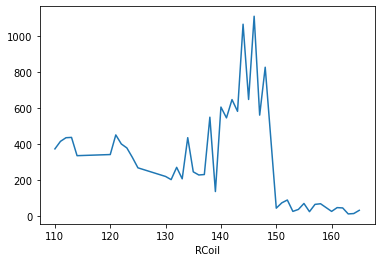

In [71]:
n_db.groupby('RCoil')['TransTotal'].sum().plot()

From this representation it seems that the most used coils are the ones approximately at the middle. Let us try to gain some more information by grouping the coils and plotting an heatmap. 

A variable summarizing the coils has been created. This variable, in particular, contains the number of the row of the coil used (here we assumed that the vending machines at hand have a standard configuration: 10 coils per row):

In [72]:
n_db_c=n_db.copy()

In [73]:
n_db_c['hor_eye'] = np.nan

In [74]:
for i in range(len(n_db_c)):
    n_db_c['hor_eye'].loc[n_db_c.index[i]] = int(str(n_db_c['RCoil'].loc[n_db_c.index[i]])[1])

This new variable is than use to plot an heatmap to use the usage of coils:

In [75]:
a = n_db_c.groupby('RCoil')['TransTotal'].sum()
b = a.to_frame()
data = pd.DataFrame({'RCoil': range(110,170),
                   'Total': 0},
                   columns = ['RCoil', 'Total'])
data = pd.merge(b, data, left_on="RCoil", right_on="RCoil")
data.drop(['Total'], axis=1, inplace= True)
data['Row'] = np.nan
data['Column'] = np.nan
for i in range(len(data)):
    data['Row'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[1])
    data['Column'].loc[data.index[i]] = int(str(data['RCoil'].loc[data.index[i]])[2])
data.drop(['RCoil'], axis=1, inplace = True)
datas = pd.DataFrame(np.nan, index=[i for i in range(1,7)], columns=[i for i in range(0,10)])
for i in range(len(data)):
    a = data['Row'].loc[data.index[i]]
    b = data['Column'].loc[data.index[i]]
    c = data['TransTotal'].loc[data.index[i]]
    datas[a][b] = c
datas.drop([0,6,7,8,9], axis =1, inplace = True)
datas

,1,2,3,4,5
1,413.00,448.75,200.50,543.50,71.50
2,433.25,398.50,268.75,645.00,87.25
3,435.00,376.50,205.00,579.75,24.00
4,333.50,323.75,433.50,1063.75,35.00
5,NaN,266.00,243.75,645.75,68.00
6,NaN,NaN,226.25,1108.00,22.50


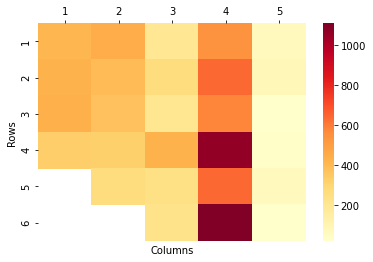

In [76]:
ax = sns.heatmap(datas, cmap = 'YlOrRd')
ax.set(xlabel="Columns", ylabel="Rows")
ax.xaxis.tick_top()

This heatmap seems to verify what was also seen before. Though, given that no extra information is provided about the configurations of the machines, we decided not to further investigate in this respect as it might be the case that the central coils are the most used because some machines might have only them, for instance. Still, these results as well as the ones obtained for the previous features, can be useful to develop new strategies and theories if combined with further information.  

## CatBoost  <a class="anchor" id="thirteenth-bullet"></a>
[Index](#index) <a class="anchor" id="index"></a>



To verify what has been previously discovered through data exploration procedures, a CatBoost has been run. CatBoost is a machine learning algorithm that uses gradient boosting on decision trees. This procedure was selected as clustering algorithms did not perform well given the huge number of categorical varibales present in the dataset. For this reason, a tree based approach was selected in order to identify what are the features generating the greatest difference between observations and so granting an higher information gain once split on those variables has been performed. 

In [77]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

To begin with, the target feature is isolated from the rest of the dataset and the train/test split is performed:

In [78]:
target = n_db["TransTotal"]

In [79]:
n_db=n_db.drop(["TransTotal"],axis=1)

In [80]:
n_db=n_db.drop(["LineTotal", "RPrice"],axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(n_db, target, test_size = 0.2, random_state=5)

In [82]:
train_dataset = cb.Pool(X_train, y_train, cat_features = ["Location", "Machine", "Product", "Category","Type", "Day_of_Week", "Festive", "Month", "RCoil"])
test_dataset = cb.Pool(X_test, y_test, cat_features = ["Location", "Machine", "Product", "Category","Type", "Day_of_Week", "Festive", "Month", "RCoil"])

In [83]:
model = cb.CatBoostRegressor(loss_function="RMSE")